In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential

train=pd.read_csv("engtamilTrain.csv")
train=train.drop(["Unnamed: 0"],axis=1)
english_sentences=train["en"]
tamil_sentence=train['ta']
english_sentences=english_sentences.head(500)
tamil_sentences=tamil_sentence.head(500)

In [2]:
tamil_sentence

0         MMA கட்சியின் துணைத்தலைவர் க்வாஸி ஹுசேன் அகமத்...
1         சமீபகாலத்தில் சில தகவல்கள் யூலியஸ் ரோசன்பேர்க...
2         ஆசோர் சாதோக்கைப் பெற்றான்; சாதோக்கு ஆகீமைப் பெ...
3         என்ன நடக்கிறது என்பது தமக்கு தெரியும் என்றும் ...
4         நான் தப்பிநடந்தது மெய்யானாலும், என் தப்பிதம் எ...
                                ...                        
166866    விரைவில் திரைக்கு வர இருக்கும் 'சிலந்தி' படத்த...
166867    தேசியவாத இயக்கங்களின் கட்சி (MHP) யின் உபதலைவர...
166868    வருஷத்தில் ஒருமுறை ஆரோன் பாவநிவாரணபலியின் இரத்...
166869    இ.தொ.கா. போலவே, மலையக மக்கள் முன்னணியும் அரச...
166870    அந்த சமயம் மட்டும் நான் இங்கே இருந்திருந்தா அந...
Name: ta, Length: 166871, dtype: object

In [3]:
english_sentences

0      MMA vice president Qazi Hussain Ahmad declared...
1      Information has surfaced in recent years sugge...
2      And Azor begat Sadoc; and Sadoc begat Achim; a...
3      She says she knows what is going on, but can d...
4      And be it indeed that I have erred, my error r...
                             ...                        
695    The Sri Lankan military has repeatedly used ar...
696    As Rajapakse increasingly blatantly prepared f...
697    And Jacob sod pottage: and Esau came from the ...
698    And when they could not come near to him for t...
699      For that I need frontline heroes," says Hari.\n
Name: en, Length: 700, dtype: object

In [6]:
# !pip install gensim

  Using cached gensim-4.2.0-cp37-cp37m-win_amd64.whl.metadata (8.6 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached Cython-0.29.28-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached gensim-4.2.0-cp37-cp37m-win_amd64.whl (24.0 MB)
Using cached Cython-0.29.28-py2.py3-none-any.whl (983 kB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.13
    Uninstalling Cython-0.29.13:
      Successfully uninstalled Cython-0.29.13


In [7]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [8]:
def sentToken(sentence):
        # dataset
    dataset = sentence

    # convert each sentence to a list of words
    sentences = [sentence.split() for sentence in dataset]

    # print the result
    print(sentences)
    
    return sentences


In [9]:
engSentence=sentToken(english_sentences)

[['MMA', 'vice', 'president', 'Qazi', 'Hussain', 'Ahmad', 'declared', 'last', 'month:', "'We", 'are', 'not', 'extremists.'], ['Information', 'has', 'surfaced', 'in', 'recent', 'years', 'suggesting', 'that', 'Julius', 'Rosenberg', 'was', 'involved', 'in', 'passing', 'some', 'form', 'of', 'intelligence', 'to', 'Soviet', 'officials', 'during', 'the', 'Second', 'World', 'War.'], ['And', 'Azor', 'begat', 'Sadoc;', 'and', 'Sadoc', 'begat', 'Achim;', 'and', 'Achim', 'begat', 'Eliud;'], ['She', 'says', 'she', 'knows', 'what', 'is', 'going', 'on,', 'but', 'can', 'do', 'nothing', 'about', 'it.'], ['And', 'be', 'it', 'indeed', 'that', 'I', 'have', 'erred,', 'my', 'error', 'remains', 'with', 'myself.'], ['Finally,', 'the', 'columnist', 'fails', 'to', 'tell', 'us', 'who', 'among', 'the', 'political', 'leaders', 'of', 'the', 'bourgeoisie,', 'past', 'and', 'present,', 'he', 'counts', 'among', 'the', 'paragons', 'of', 'morality.'], ['These', 'include', 'the', 'British', 'Tamil', 'Forum,', 'La', 'Maiso

In [10]:
tamSentence=sentToken(tamil_sentences)

[['MMA', 'கட்சியின்', 'துணைத்தலைவர்', 'க்வாஸி', 'ஹுசேன்', 'அகமத்', 'சென்ற', 'மாதம்', 'பின்வருமாறு', 'அறிவித்தார்:', '``நாங்கள்', 'தீவிரவாதிகள்', 'அல்ல.'], ['சமீபகாலத்தில்', 'சில', 'தகவல்கள்', 'யூலியஸ்', 'ரோசன்பேர்க்', 'ஒரு', 'வித', 'உளவுச்செய்தியை', 'சோவியத்', 'அதிகாரிகளுக்கு', 'இரண்டாம்', 'உலகப்போரின்போது', 'அனுப்பியதில்', 'சம்பந்தப்பட்டு', 'இருந்ததாக', 'வெளிவந்துள்ளன.'], ['ஆசோர்', 'சாதோக்கைப்', 'பெற்றான்;', 'சாதோக்கு', 'ஆகீமைப்', 'பெற்றான்;', 'ஆகீம்', 'எலியூதைப்', 'பெற்றான்;'], ['என்ன', 'நடக்கிறது', 'என்பது', 'தமக்கு', 'தெரியும்', 'என்றும்', 'ஆனால்,', 'தம்மால்', 'எதுவும்', 'செய்யமுடியாது', 'என்றும்', 'கடிதம்', 'எழுதியிருந்தார்.'], ['நான்', 'தப்பிநடந்தது', 'மெய்யானாலும்,', 'என்', 'தப்பிதம்', 'என்னோடேதான்', 'இருக்கிறது'], ['டால்ரிம்பிளினுடைய', 'அறிவுஜீவித்', 'தொடுவானத்திற்கு', 'அப்பால்', 'எவ்வளவோ', 'தொலைவில்', 'இருந்தன'], ['இந்த', 'அமைப்புக்களில்', 'British', 'Tamil', 'Forum,', 'La', 'Maison', 'du', 'Tamil', 'Eelam', '(France),', 'the', 'Canadian', 'Tamil', 'Congress,', 'Swiss',

In [11]:
# Pre-trained model links

#https://radimrehurek.com/gensim_3.8.3/models/word2vec.html
#https://radimrehurek.com/gensim/models/word2vec.html

In [12]:
def ownWordModel(langsentence,modelname):
    from gensim.models import Word2Vec
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    model = Word2Vec(langsentence, min_count=1)
    print(model)
    # save model
    model.save(modelname)
    # fit a 2d PCA model to the vectors
    X = model.wv.vectors  # corrected line
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    words = list(model.wv.index_to_key)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()


In [13]:
import warnings
warnings.filterwarnings("ignore")

Word2Vec<vocab=5671, vector_size=100, alpha=0.025>


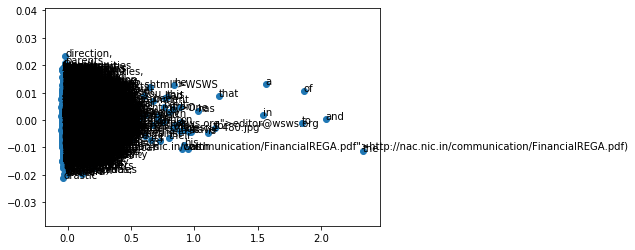

In [14]:
ownWordModel(engSentence,"engmodel.bin")


Word2Vec<vocab=7409, vector_size=100, alpha=0.025>


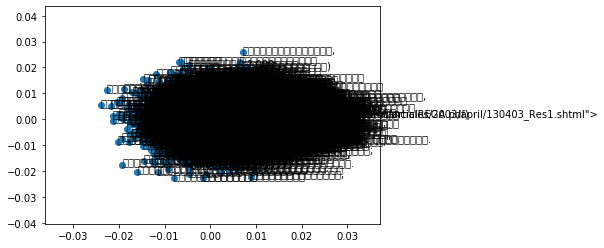

In [15]:
ownWordModel(tamSentence,"tammodel.bin")